# Chapter 7 : Signal Processing and Time Series

In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,pandas,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

/srv/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Gopala KR 
last updated: 2018-02-20 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.14.0
pandas 0.22.0
matplotlib 2.1.2
nltk 3.2.5
sklearn 0.19.1
tensorflow 1.5.0
theano 1.0.1
mxnet 1.1.0
chainer 3.4.0
seaborn 0.8.1
keras 2.1.4
tflearn n
bokeh 0.12.14
gensim 3.3.0


/srv/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
!pip install pkgutil
!pip install scipy
!pip install pydoc
!pip install statsmodels

  Could not find a version that satisfies the requirement pkgutil (from versions: )
No matching distribution found for pkgutil
  Could not find a version that satisfies the requirement pydoc (from versions: )
No matching distribution found for pydoc
    100% |████████████████████████████████| 6.3MB 57kB/s  eta 0:00:01
    100% |████████████████████████████████| 235kB 4.0MB/s eta 0:00:01


In [3]:
import pkgutil as pu
import numpy as np
import matplotlib as mpl
import scipy as sp
import pandas as pd
import pydoc
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

/srv/venv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Introduction to Time Series

## Stationary and non Stationary Time Series

### Sunspots data

In [4]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [5]:
sunspots_df = sm.datasets.sunspots.load_pandas().data
del sunspots_df["YEAR"]
sunspots_sa = sunspots_df["SUNACTIVITY"]

In [6]:
sunspots_df.head(5)

,SUNACTIVITY
0,5.0
1,11.0
2,16.0
3,23.0
4,36.0


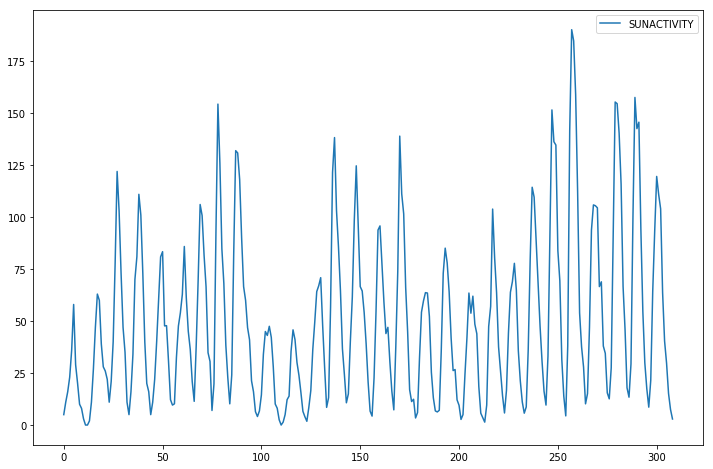

In [7]:
sunspots_df.plot(figsize=(12,8))
plt.show()

### US Macroeconomic data

In [8]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [9]:
macro_df = sm.datasets.macrodata.load_pandas().data

In [10]:
macro_df.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [11]:
macro_df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
macro_cpi = macro_df["cpi"]

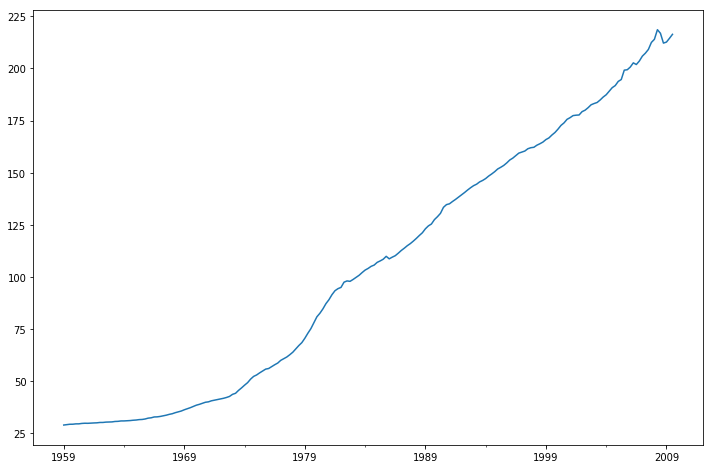

In [12]:
macro_cpi.plot(figsize=(12,8))
plt.show()

### Airline dataset

In [13]:
airline = pd.Series.from_csv('international-airline-passengers-cleaned.csv', header=0)

/srv/venv/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [14]:
airline.head(5)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

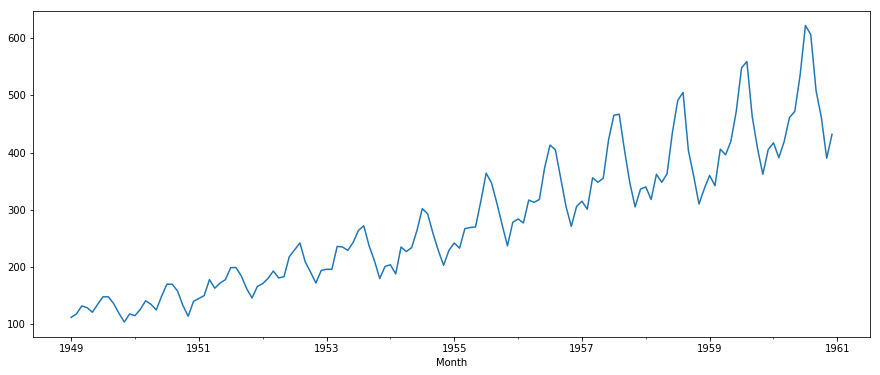

In [15]:
airline.plot()
plt.show()

## Checking Data types

In [16]:
print(sunspots_df.dtypes)

SUNACTIVITY    float64
dtype: object


In [17]:
print(macro_df.dtypes)

year        float64
quarter     float64
realgdp     float64
realcons    float64
realinv     float64
realgovt    float64
realdpi     float64
cpi         float64
m1          float64
tbilrate    float64
unemp       float64
pop         float64
infl        float64
realint     float64
dtype: object


In [18]:
print(airline.dtypes)

int64


In [19]:
print(type(sunspots_df))

<class 'pandas.core.frame.DataFrame'>


In [20]:
print(type(macro_df))

<class 'pandas.core.frame.DataFrame'>


In [21]:
print(type(macro_cpi))

<class 'pandas.core.series.Series'>


In [22]:
print(type(airline))

<class 'pandas.core.series.Series'>


# Visualize Time Series

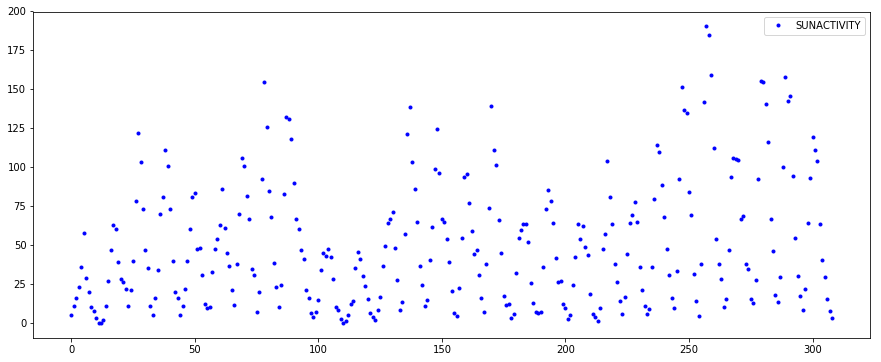

In [23]:
sunspots_df.plot(style="b.")
plt.show()

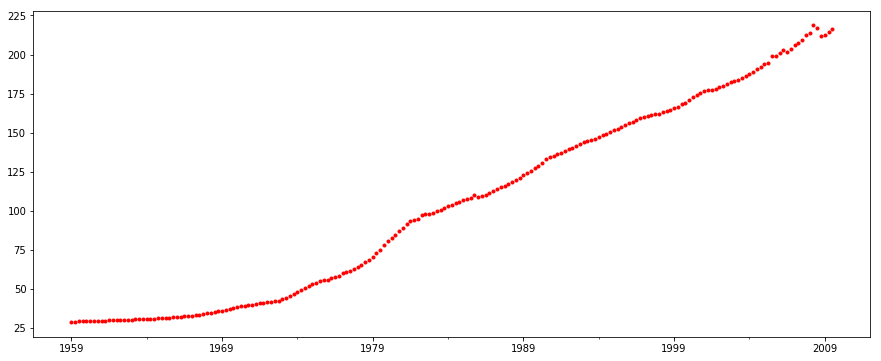

In [24]:
macro_cpi.plot(style="r.")
plt.show()

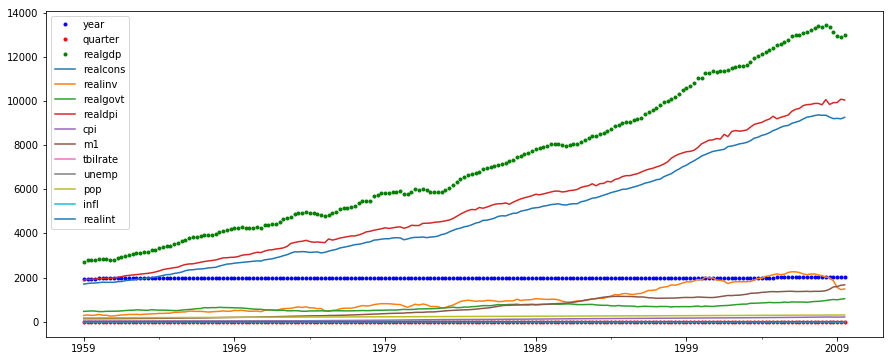

In [25]:
macro_df.plot(style=["b.","r.","g."])
plt.show()

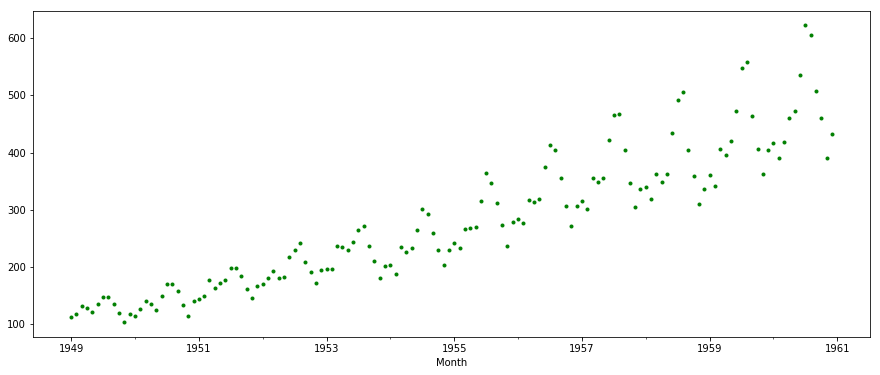

In [26]:
airline.plot(style="g.")
plt.show()

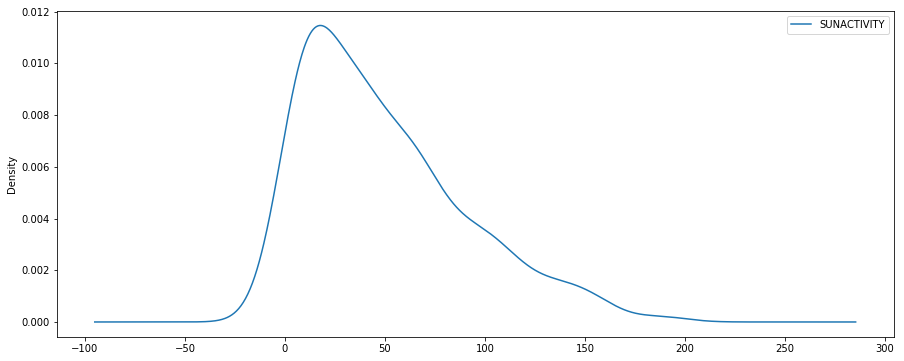

In [27]:
sunspots_df.plot(kind="kde")
plt.show()

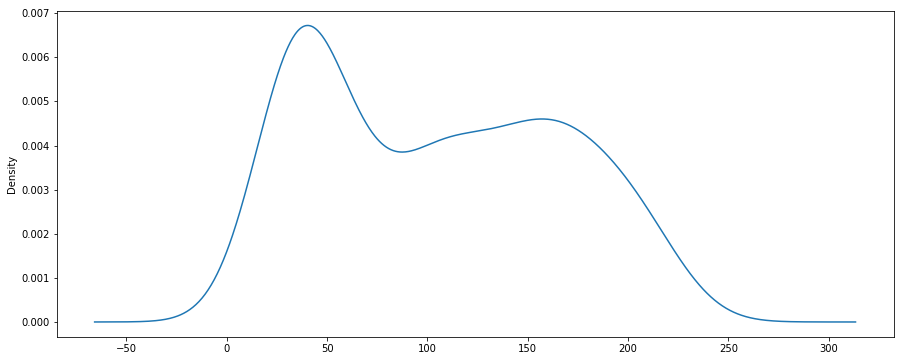

In [28]:
macro_cpi.plot(kind="kde")
plt.show()

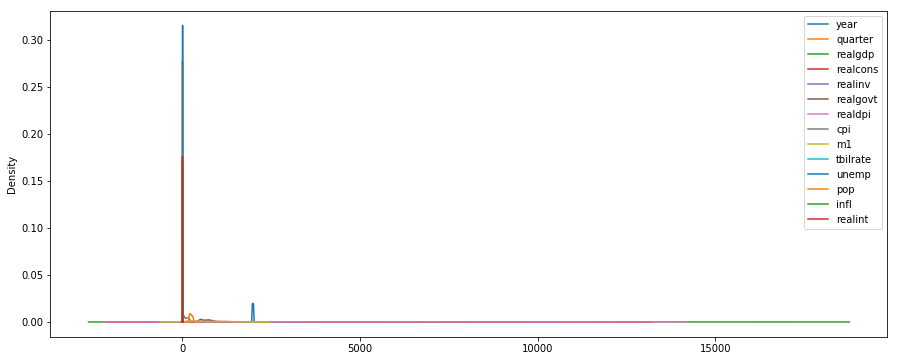

In [29]:
macro_df.plot(kind="kde")
plt.show()

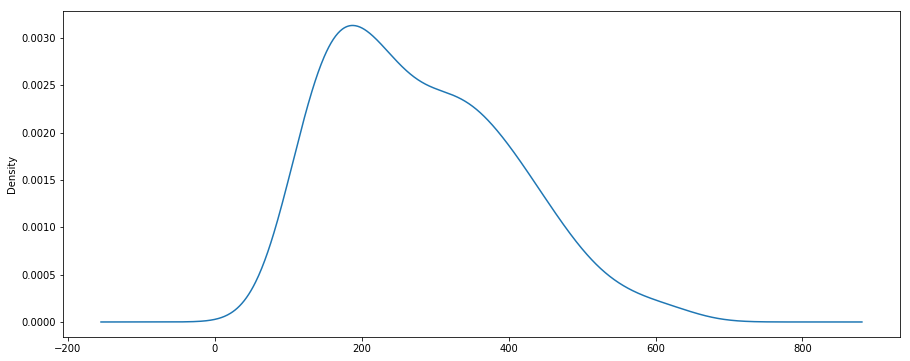

In [30]:
airline.plot(kind="kde")
plt.show()

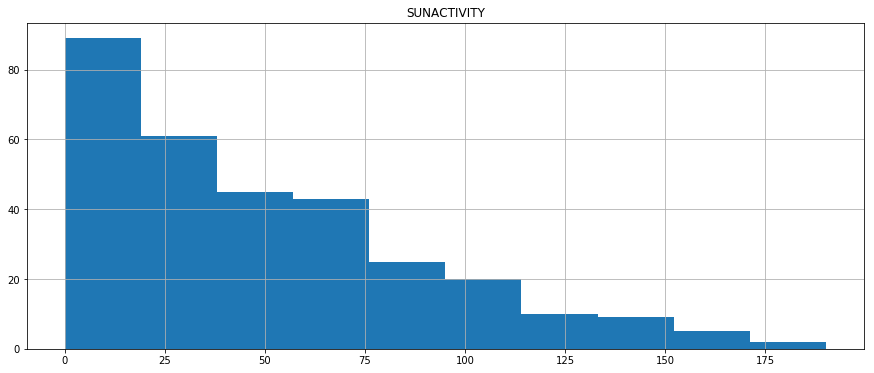

In [31]:
sunspots_df.hist()
plt.show()

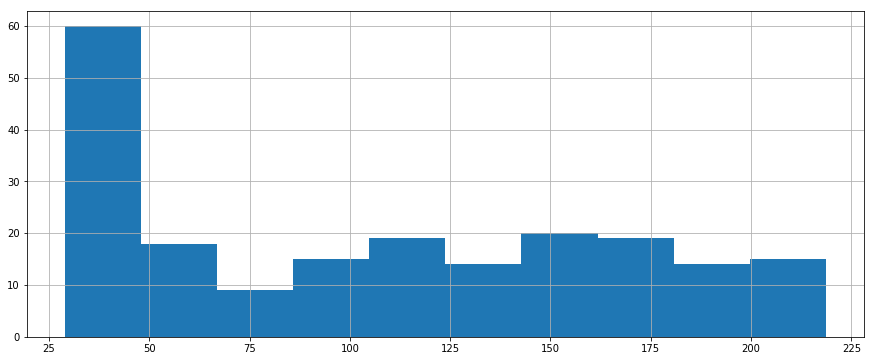

In [32]:
macro_cpi.hist()
plt.show()

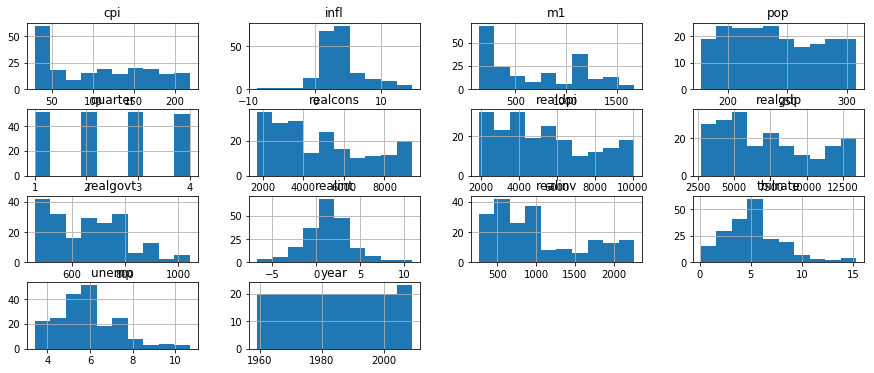

In [33]:
macro_df.hist()
plt.show()

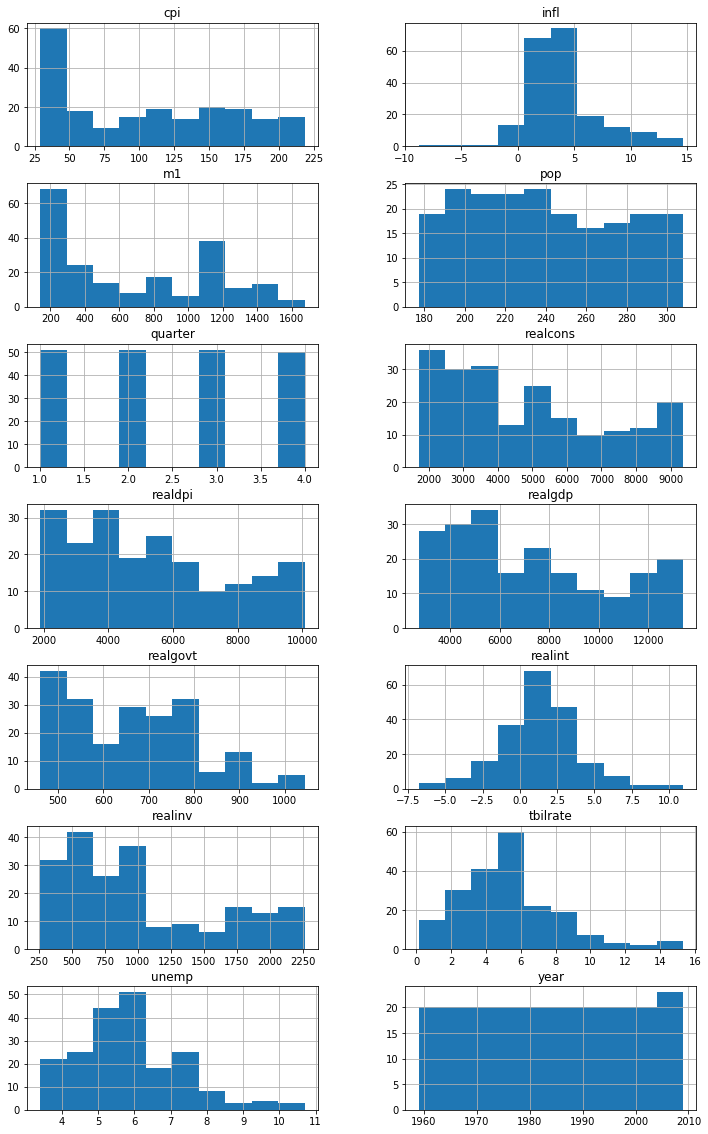

In [34]:
macro_df.hist(layout=(7,2),figsize=(12,20))
plt.show()

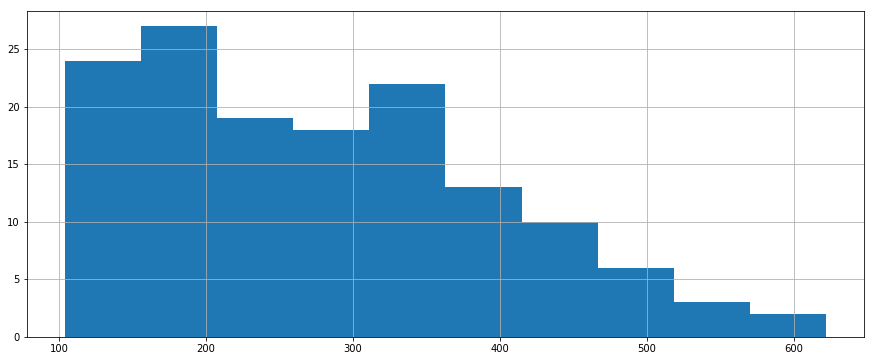

In [35]:
airline.hist()
plt.show()

/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


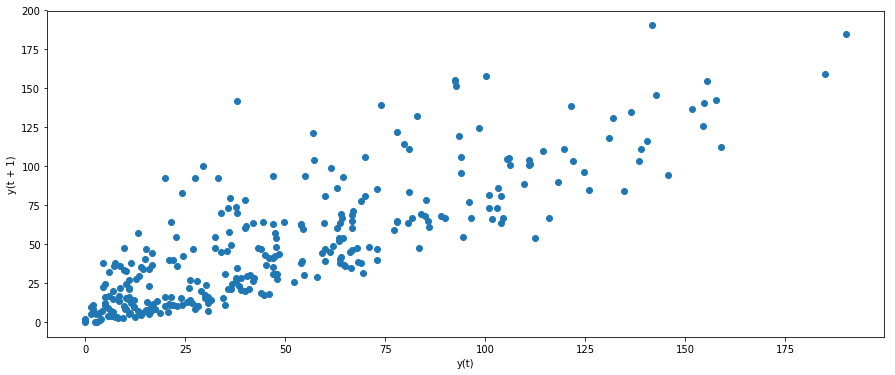

In [36]:
pd.tools.plotting.lag_plot(sunspots_df)
plt.show()

/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


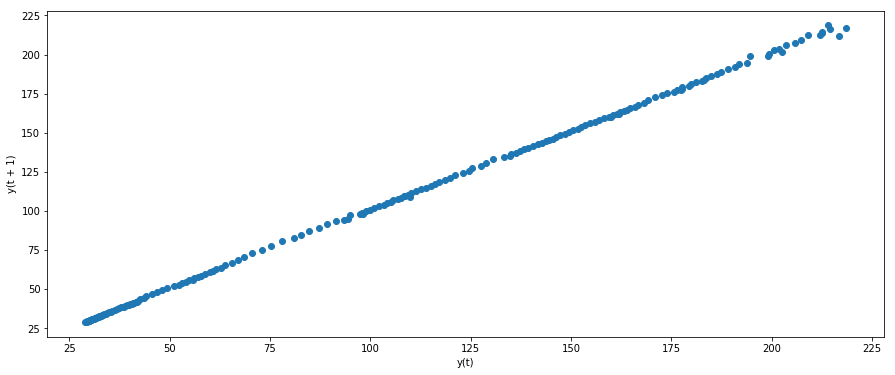

In [37]:
pd.tools.plotting.lag_plot(macro_cpi)
plt.show()

/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


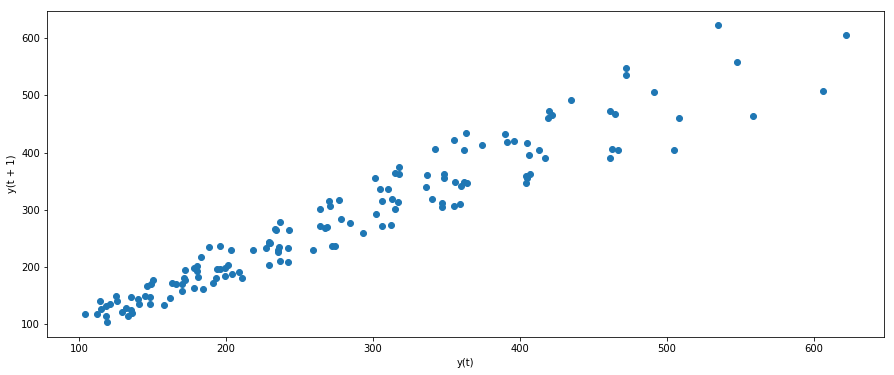

In [38]:
pd.tools.plotting.lag_plot(airline)
plt.show()

# Check stationarity

## Dickey-Fuller Test
### Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
### Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [39]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

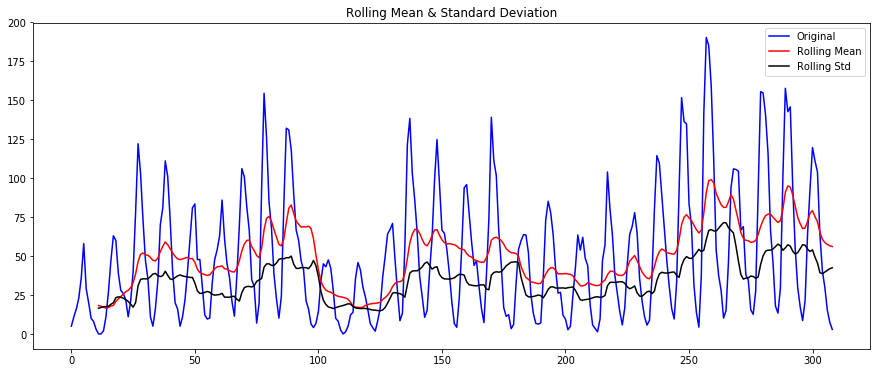

Results of Dickey-Fuller Test:
Test Statistic                  -2.837781
p-value                          0.053076
#Lags Used                       8.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


In [40]:
test_stationarity(sunspots_sa)

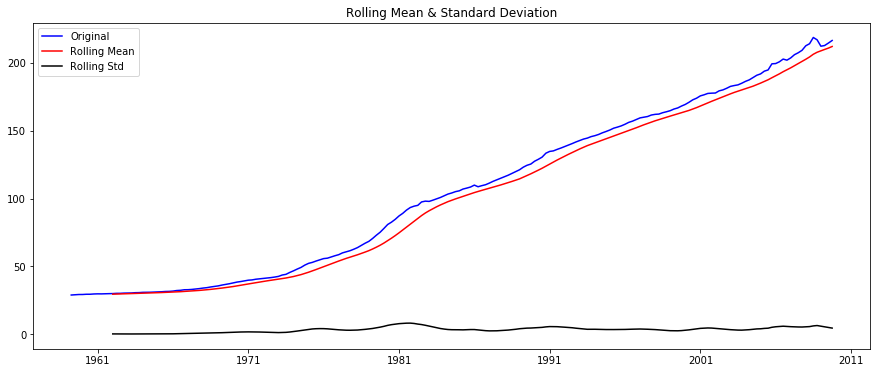

Results of Dickey-Fuller Test:
Test Statistic                   0.730795
p-value                          0.990433
#Lags Used                      12.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [41]:
test_stationarity(macro_cpi)

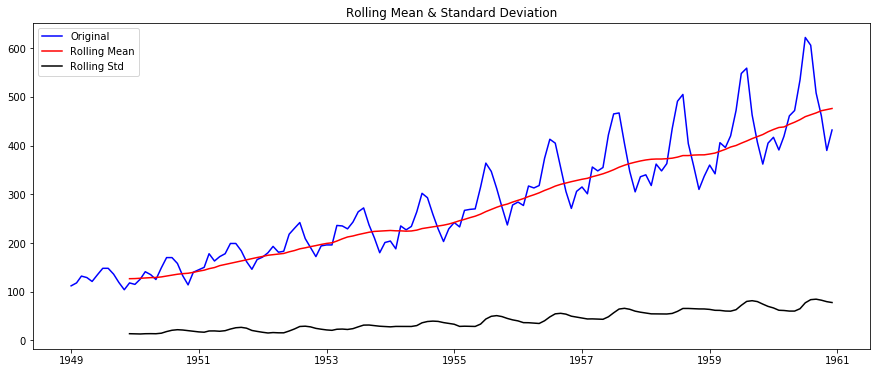

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [42]:
test_stationarity(airline)

In [43]:
airline_log = np.log(airline)

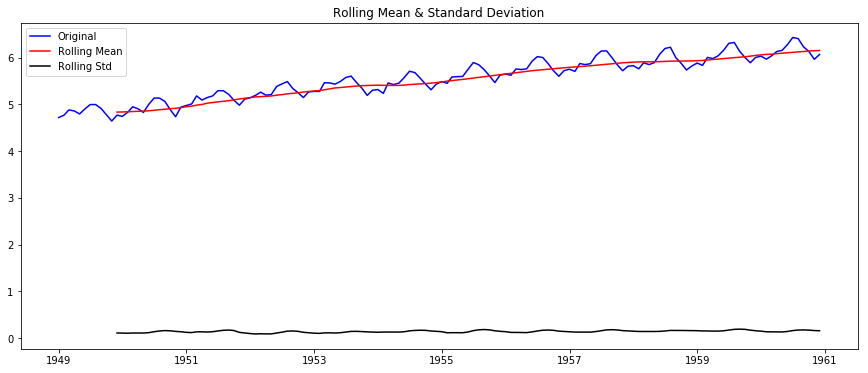

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [44]:
test_stationarity(airline_log)

# Decomposing TimeSeries

## Multiplicative Model : y(t) = Level * Trend * Seasonality * Noise

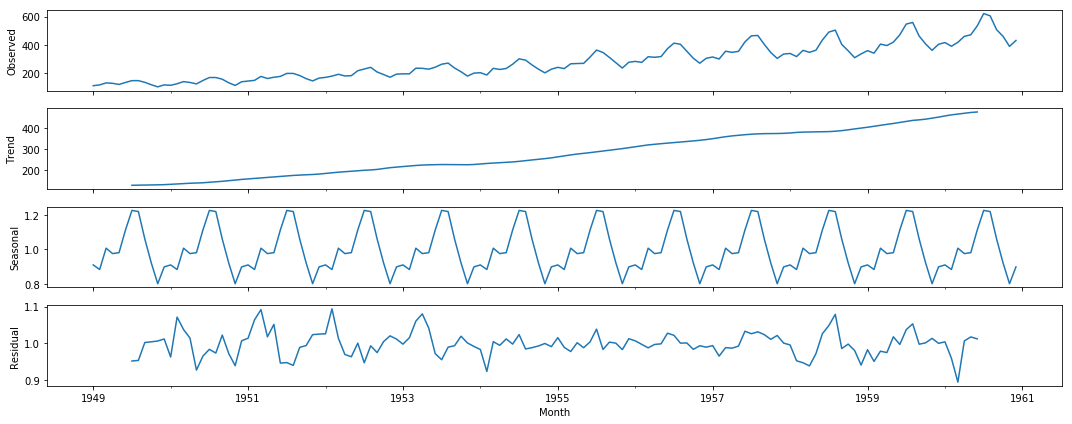

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline, model='multiplicative')
result.plot()
plt.show()

## Additive Model : y(t) = Level + Trend + Seasonality + Noise

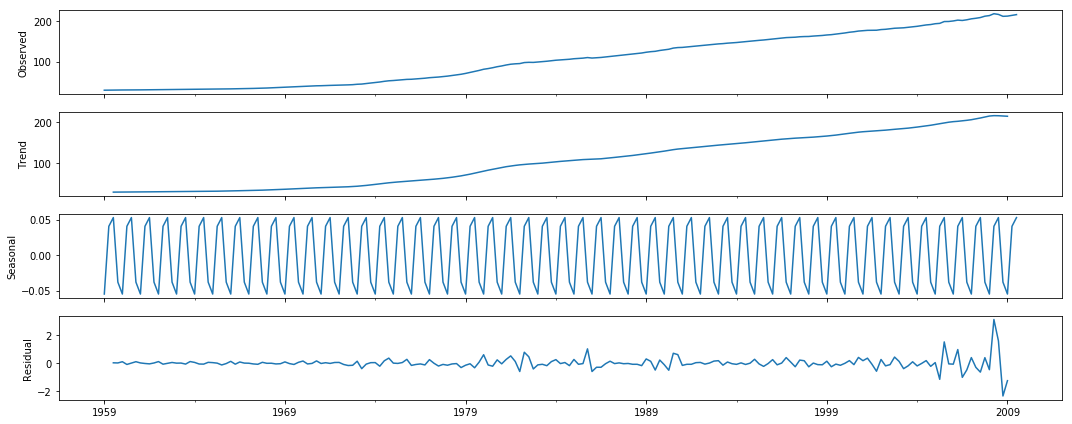

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(macro_cpi, model='additive')
result.plot()
plt.show()

# Smoothing with moving average

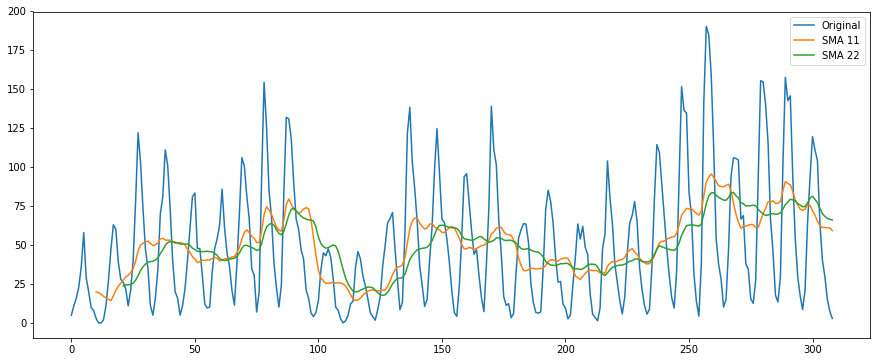

In [47]:
plt.plot(sunspots_sa, label="Original")
plt.plot(sunspots_sa.rolling(window=11).mean(), label="SMA 11")
plt.plot(sunspots_sa.rolling(window=22).mean(), label="SMA 22")
plt.legend()
plt.show()

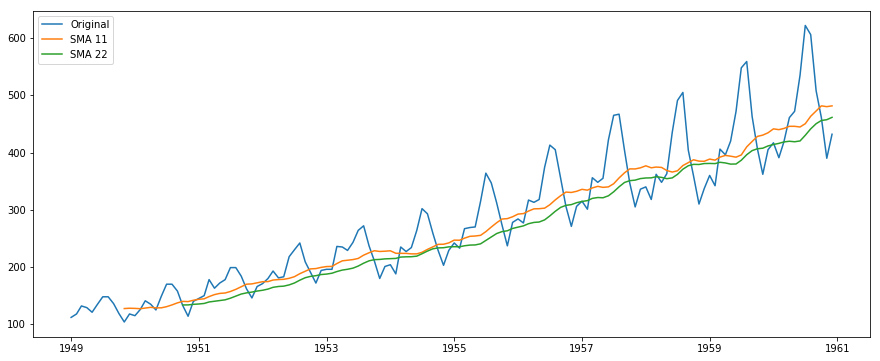

In [48]:
plt.plot(airline, label="Original")
plt.plot(airline.rolling(window=11).mean(), label="SMA 11")
plt.plot(airline.rolling(window=22).mean(), label="SMA 22")
plt.legend()
plt.show()

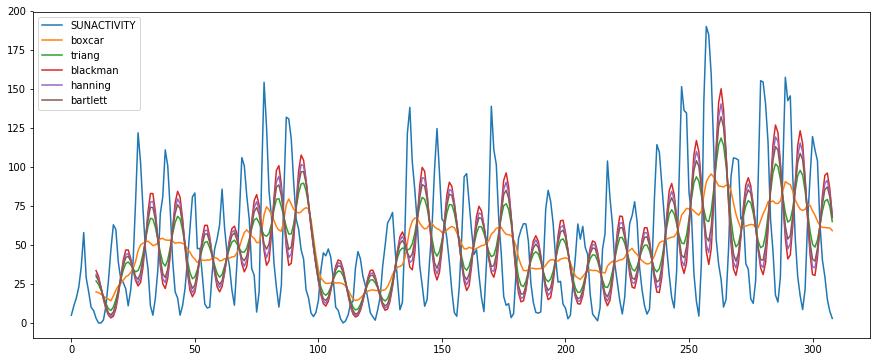

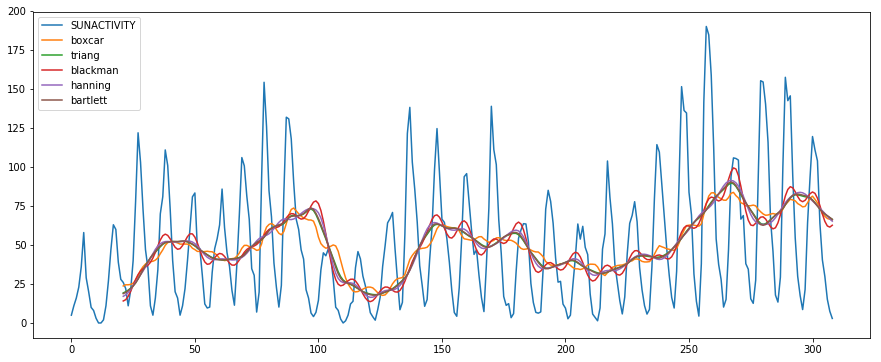

In [49]:
df = pd.DataFrame({'SUNACTIVITY':sunspots_df['SUNACTIVITY']})
ax = df.plot()

def plot_window(win_type):
    df2 = df.rolling(window=11, win_type=win_type).mean()
    df2.columns = [win_type]
    df2.plot(ax=ax)

plot_window('boxcar')
plot_window('triang')
plot_window('blackman')
plot_window('hanning')
plot_window('bartlett')
plt.show()

ax = df.plot()

def plot_window(win_type):
    df2 = df.rolling(window=22, win_type=win_type).mean()
    df2.columns = [win_type]
    df2.plot(ax=ax)

plot_window('boxcar')
plot_window('triang')
plot_window('blackman')
plot_window('hanning')
plot_window('bartlett')
plt.show()

# Cointegration

In [50]:
import statsmodels.api as sm
from pandas.stats.moments import rolling_window
import pandas as pd
import statsmodels.tsa.stattools as ts
import numpy as np

def calc_adf(x, y):
    result = sm.OLS(x, y).fit()    
    return ts.adfuller(result.resid)

data_loader = sm.datasets.sunspots.load_pandas()
data = data_loader.data.values
N = len(data)

t = np.linspace(-2 * np.pi, 2 * np.pi, N)
sine = np.sin(np.sin(t))
print("Self ADF", calc_adf(sine, sine))

noise = np.random.normal(0, .01, N)
print("ADF sine with noise", calc_adf(sine, sine + noise))

cosine = 100 * np.cos(t) + 10
print("ADF sine vs cosine with noise", calc_adf(sine, cosine + noise))

print("Sine vs sunspots", calc_adf(sine, data))

Self ADF (nan, nan, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -inf)
ADF sine with noise (-16.18801707504324, 4.199083507067237e-29, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -1858.6238811578746)
ADF sine vs cosine with noise (-6.216070150792762, 5.362107247160806e-08, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -10098.557123751976)
Sine vs sunspots (-6.724269181070095, 3.4210811915550405e-09, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -1102.5867415291168)


# Autocorrelation

[ 9 11 10  1  0]


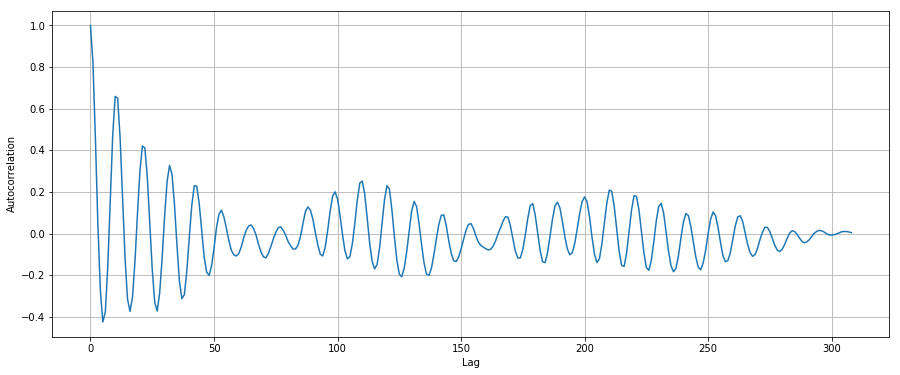

/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


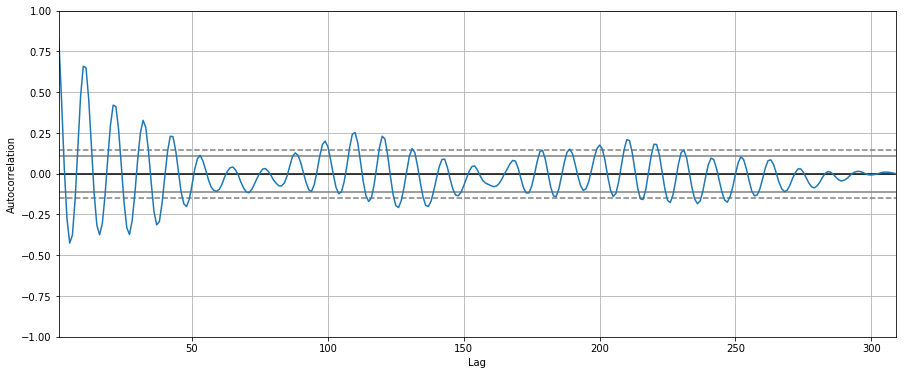

In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot

data_loader = sm.datasets.sunspots.load_pandas()
data = data_loader.data["SUNACTIVITY"].values
y = data - np.mean(data)
norm = np.sum(y ** 2)
correlated = np.correlate(y, y, mode='full')/norm
res = correlated[int(len(correlated)/2):]

print(np.argsort(res)[-5:])
plt.plot(res)
plt.grid(True)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()
autocorrelation_plot(data)
plt.show()

# Autoregressive models

Params [0.67172672 0.33626295]
Root mean square error 22.8148122612597
Mean absolute error 17.651544650286237
Mean absolute percentage error 60.78178007359871
Symmetric Mean absolute percentage error 34.98433861762137
Coefficient of determination 0.7999402927786483


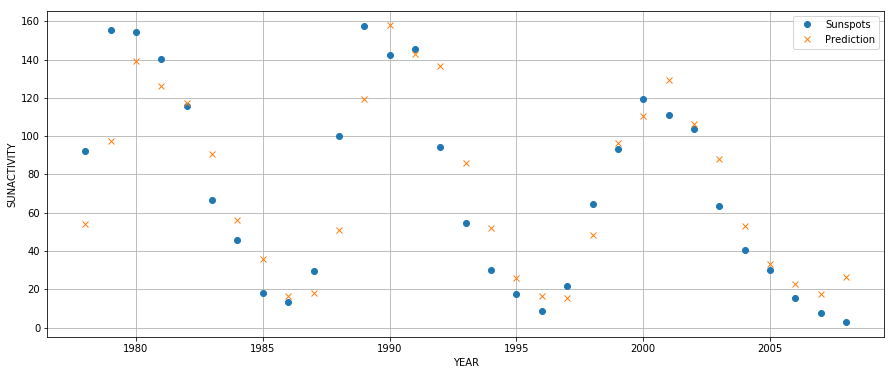

In [52]:
from scipy.optimize import leastsq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

def model(p, x1, x10):
   p1, p10 = p
   return p1 * x1 + p10 * x10

def error(p, data, x1, x10):
   return data - model(p, x1, x10)

def fit(data):
   p0 = [.5, 0.5]
   params = leastsq(error, p0, args=(data[10:], data[9:-1], 
data[:-10]))[0]
   return params

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

cutoff = int(.9 * len(sunspots))
params = fit(sunspots[:cutoff])
print("Params", params)

pred = params[0] * sunspots[cutoff-1:-1] + params[1] * sunspots[cutoff-10:-10]
actual = sunspots[cutoff:]
print("Root mean square error", np.sqrt(np.mean((actual - pred) ** 2)))
print("Mean absolute error", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 * 
np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred)/2
print("Symmetric Mean absolute percentage error", 100 * 
np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred) ** 
2).sum()/ ((actual - actual.mean()) ** 2).sum())
year_range = data_loader.data["YEAR"].values[cutoff:]
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()
plt.show()

# ARMA models

/srv/venv/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/srv/venv/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/srv/venv/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


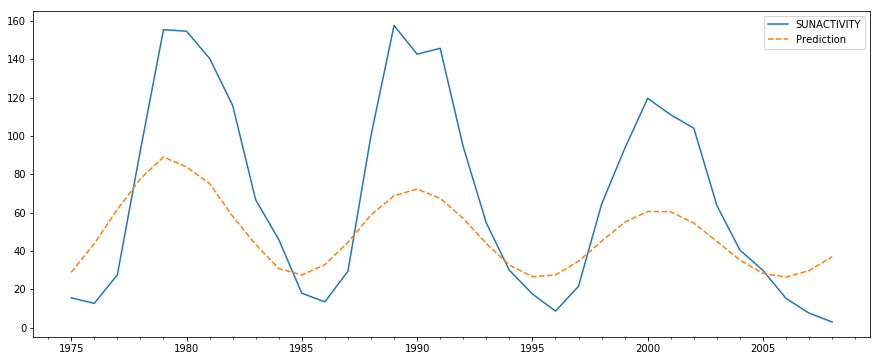

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
years = df["YEAR"].values.astype(int)
df.index = pd.Index(sm.tsa.datetools.dates_from_range(str(years[0]), 
str(years[-1])))
del df["YEAR"]

model = sm.tsa.ARMA(df, (10,1)).fit()
prediction = model.predict('1975', str(years[-1]), dynamic=True)

df['1975':].plot()
prediction.plot(style='--', label='Prediction')
plt.legend()
plt.show()

# Periodc signals

Params [ 47.1880006   28.89947462   0.56827279   6.51178464   4.55214564
   0.29372076 -14.30924768 -18.16524123   0.06574835  -4.37789476]
Root mean square error 59.56205597915569
Mean absolute error 44.58158470150657
Mean absolute percentage error 65.16458348768887
Symmetric Mean absolute percentage error 78.4480696873044
Coefficient of determination -0.3635315489903188


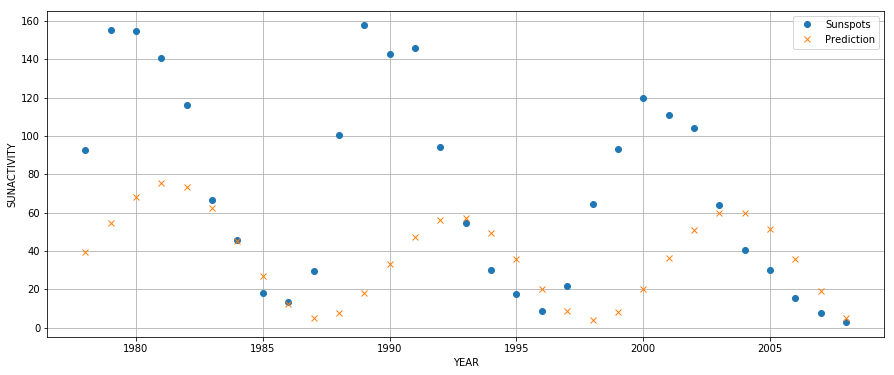

In [54]:
from scipy.optimize import leastsq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
def model(p, t):
   C, p1, f1, phi1 , p2, f2, phi2, p3, f3, phi3 = p
   return C + p1 * np.sin(f1 * t + phi1) + p2 * np.sin(f2 * t + 
phi2) +p3 * np.sin(f3 * t + phi3)


def error(p, y, t):
   return y - model(p, t)

def fit(y, t):
   p0 = [y.mean(), 0, 2 * np.pi/11, 0, 0, 2 * np.pi/22, 0, 0, 2 * 
np.pi/100, 0]
   params = leastsq(error, p0, args=(y, t))[0]
   return params

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

cutoff = int(.9 * len(sunspots))
params = fit(sunspots[:cutoff], years[:cutoff])
print("Params", params)

pred = model(params, years[cutoff:])
actual = sunspots[cutoff:]
print("Root mean square error", np.sqrt(np.mean((actual - pred) ** 
2)))
print("Mean absolute error", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 * 
np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred)/2
print("Symmetric Mean absolute percentage error", 100 * 
np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred) ** 
2).sum()/ ((actual - actual.mean()) ** 2).sum())
year_range = data_loader.data["YEAR"].values[cutoff:]
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()
plt.show()

# Fourier Analysis

Index of max sine FFT [160 157 166 158 154]
Indices of max sunspots FFT [205 212 215 209 154]


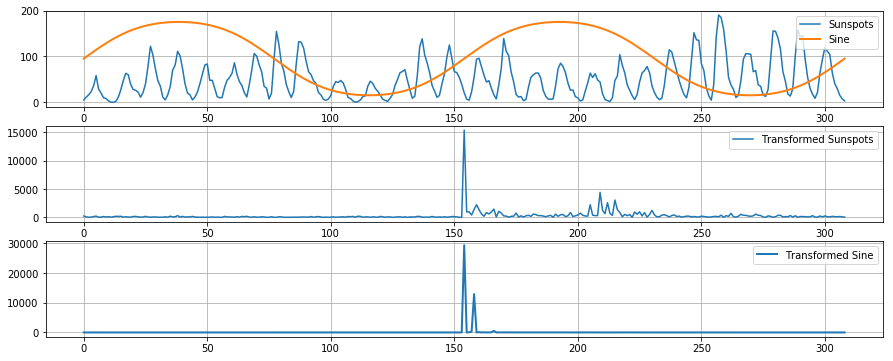

In [55]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

t = np.linspace(-2 * np.pi, 2 * np.pi, len(sunspots))
mid = np.ptp(sunspots)/2
sine = mid + mid * np.sin(np.sin(t))

sine_fft = np.abs(fftshift(rfft(sine)))
print("Index of max sine FFT", np.argsort(sine_fft)[-5:])

transformed = np.abs(fftshift(rfft(sunspots)))
print("Indices of max sunspots FFT", np.argsort(transformed)[-5:])

plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.plot(sine, lw=2, label="Sine")
plt.grid(True)
plt.legend()
plt.subplot(312)
plt.plot(transformed, label="Transformed Sunspots")
plt.grid(True)
plt.legend()
plt.subplot(313)
plt.plot(sine_fft, lw=2, label="Transformed Sine")
plt.grid(True)
plt.legend()
plt.show()

# Spectral Analysis

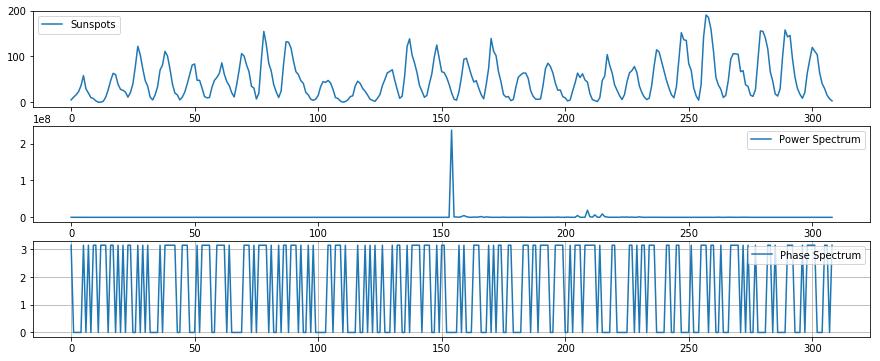

In [56]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

transformed = fftshift(rfft(sunspots))

plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.legend()
plt.subplot(312)
plt.plot(transformed ** 2, label="Power Spectrum")
plt.legend()
plt.subplot(313)
plt.plot(np.angle(transformed), label="Phase Spectrum")
plt.grid(True)
plt.legend()
plt.show()

# Filtering

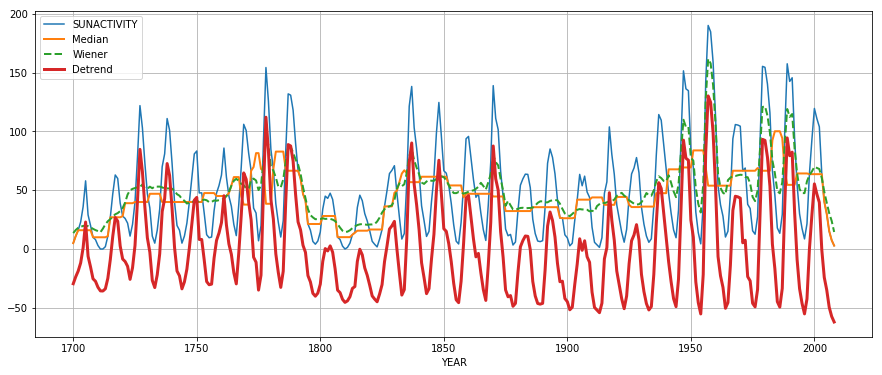

In [57]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.signal import wiener
from scipy.signal import detrend

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

plt.plot(years, sunspots, label="SUNACTIVITY")
plt.plot(years, medfilt(sunspots, 11), lw=2, label="Median")
plt.plot(years, wiener(sunspots, 11), '--', lw=2, label="Wiener")
plt.plot(years, detrend(sunspots), lw=3, label="Detrend")
plt.xlabel("YEAR")
plt.grid(True)
plt.legend()
plt.show()